## Generating Tests

In [2]:
import random

def generate_tests(num_tests, max_n, max_pattern):
    tests = []
    for i in range(num_tests):
        # Generate test cases with random n and patterns
        n = random.randint(1, max_n) # Number of customers
        patterns = [random.randint(1, max_pattern) for _ in range(n)]
        test_input = f"1\n{n}\n{' '.join(map(str, patterns))}"
        test = {
            "description": f"Random test with {n} toy patterns",
            "input": test_input,
        }
        tests.append(test)
    
    return tests

## Measuring Execution Time

In [3]:
import time
import subprocess
from typing import Tuple

def measure_execution_time(exec_cmd: str, input_arg: str) -> Tuple[str, float]:
    """
    Measure execution time and output of a command.

    Args:
        exec_cmd (str): The command to execute.
        input_arg (str): The input argument for the command.

    Returns:
        Tuple[str, float]: The output and execution time.
    """
    
    start_time = time.time()
    
    proc = subprocess.Popen(exec_cmd, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)
    
    try:
        output, error = proc.communicate(input=input_arg.encode())
    except subprocess.CalledProcessError as error:
        output = error.output.decode('utf-8')
    
    execution_time = time.time() - start_time
    
    return output.decode('utf-8'), execution_time

## Estimating Time Complexity

In [4]:
import numpy as np
from scipy.optimize import curve_fit

def linear(n, a, b):
    return a * n + b

def logarithmic(n, a, b):
    return a * np.log(n) + b

def nlogn(n, a, b):
    return a * n * np.log(n) + b

def quadratic(n, a, b, c):
    return a * n**2 + b*n + c

def constant(n, a):
    return a * np.ones_like(n)

def get_best_fit_function(xdata, ydata):
    functions = [linear, logarithmic, nlogn, quadratic, constant]
    fits = []

    for func in functions:
        popt, pcov = curve_fit(func, xdata, ydata)
        residuals = ydata - func(xdata, *popt)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((ydata - np.mean(ydata))**2)
        r2 = 1 - (ss_res / ss_tot)
        fits.append((r2, func.__name__))

    # Get the function with the highest R^2 value
    fits.sort(reverse=True, key=lambda x: x[0])
    return fits[0][1]

def estimate_complexity(sizes, times):
    best_fit = get_best_fit_function(sizes, times)
    
    complexity_mapper = {
        "constant": "O(1)",
        "logarithmic": "O(log n)",
        "linear": "O(n)",
        "nlogn": "O(n log n)",
        "quadratic": "O(n^2)"
    }
    
    return complexity_mapper.get(best_fit, "Unknown")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def run_test_suite(test_cases, exec_cmd, num_runs=5):
    results = []

    for test_case in test_cases:
        input_arg = test_case.get("input")
        lines = input_arg.split("\n")
        toy_patterns = [int(pattern) for pattern in lines[2].split()] if len(lines) > 2 else []
        max_toy_pattern = max(toy_patterns) if toy_patterns else 0

        execution_times = []
        for _ in range(num_runs):
            _, execution_time = measure_execution_time(exec_cmd, input_arg)
            execution_times.append(execution_time)

        avg_execution_time = sum(execution_times) / num_runs
        std_execution_time = np.std(execution_times)

        results.append({
            "Largest Toy Pattern Value": max_toy_pattern,
            "Toy patterns": ', '.join(map(str, toy_patterns)),
            "Average Execution Time": avg_execution_time,
            "Standard Deviation": std_execution_time
        })

    # Convert results to a DataFrame
    df = pd.DataFrame(results)
    
    # Assume the function "estimate_complexity" exists elsewhere in your code
    # estimate = estimate_complexity(df['Largest Toy Pattern Value'].to_numpy(), df['Average Execution Time'].to_numpy())
    # print(f"Estimated Complexity: {estimate}")

    # Plot Execution Time vs Value of Largest Toy Pattern
    plt.figure(figsize=(10, 6))
    plt.plot(df['Largest Toy Pattern Value'], df['Average Execution Time'], 'o-', label='Execution Time')
    plt.xlabel('Value of Largest Toy Pattern')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title('Execution Time vs Value of Largest Toy Pattern')
    plt.grid(True)
    plt.legend()
    plt.show()

    return df

## Generate Some Test Cases

In [10]:
NUM_TESTS = 1000
MAX_N = 1000
MAX_PATTERN = 10**9
TEST_CASES = generate_tests(NUM_TESTS, MAX_N, MAX_PATTERN)

## First Attempt In Python

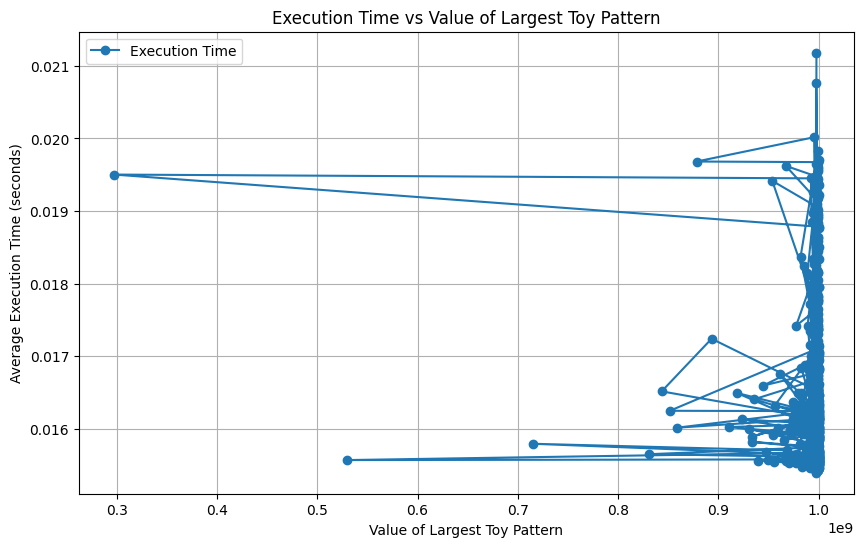

,Largest Toy Pattern Value,Toy patterns,Average Execution Time,Standard Deviation
0,997780115,"517853557, 691419691, 403967906, 148532696, 20...",0.021180,0.004888
1,997170063,"595123349, 307728994, 610264650, 409911669, 30...",0.016735,0.000433
2,998198148,"587063732, 816742065, 610781684, 11335186, 176...",0.017498,0.000927
3,998312184,"846717010, 453398982, 157117724, 80835333, 281...",0.017424,0.000807
4,989868833,"108137551, 828074667, 522115242, 399914941, 27...",0.016295,0.000348
...,...,...,...,...
995,999582936,"547098511, 349635261, 313319698, 693520324, 24...",0.015667,0.000201
996,999928345,"584908822, 366189856, 121291585, 119486052, 72...",0.015520,0.000091
997,996982494,"23944621, 699411295, 927977065, 990157137, 207...",0.015543,0.000140
998,998463021,"971836781, 525366338, 287054476, 995128162, 68...",0.015649,0.000077


In [11]:
PYTHON_PROGRAM = "wooden_toy_v1.py"

exec_cmd = f"python3 {PYTHON_PROGRAM}"

run_test_suite(test_cases=TEST_CASES, exec_cmd=exec_cmd)

## Final Java Implementation

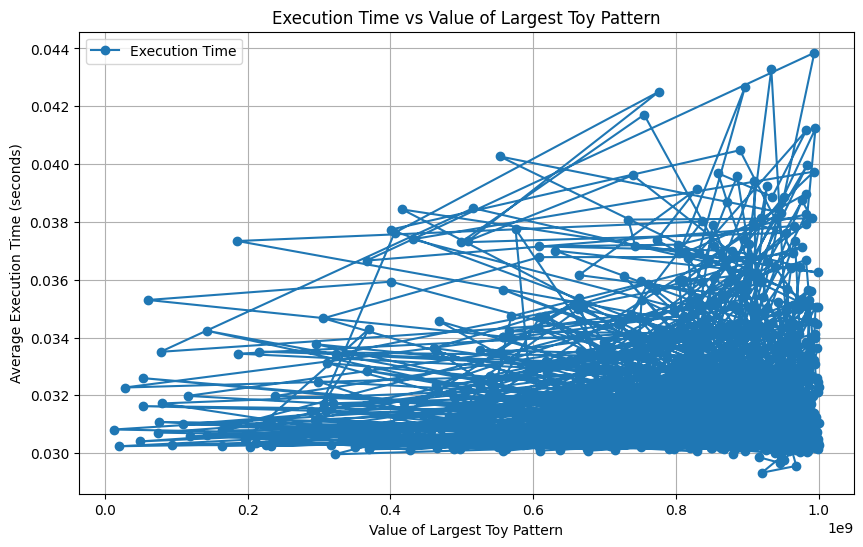

,Largest Toy Pattern Value,Toy patterns,Average Execution Time,Standard Deviation
0,984605705,"686301137, 29310497, 537665204, 984605705, 203...",0.035634,0.005179
1,764705885,"764705885, 409095628, 597123755",0.030630,0.000595
2,741600601,"345952826, 493301834, 711742436, 129308904, 12...",0.034124,0.005757
3,681683587,"615912101, 681683587, 302042334",0.033451,0.001017
4,872259564,"45748949, 561806176, 872259564",0.033049,0.001074
...,...,...,...,...
995,895000247,"796144439, 331405591, 480170623, 387171361, 89...",0.037416,0.004438
996,993376296,"470419804, 216009931, 766515671, 101946710, 51...",0.039738,0.003971
997,431134507,"2863114, 431134507",0.037397,0.005540
998,886850904,"886850904, 335255263, 9526721, 131399129, 5736...",0.034488,0.002742


In [7]:
JAVA_PROGRAM = "ToyFestival"

exec_cmd = f"java {JAVA_PROGRAM}"

run_test_suite(test_cases=TEST_CASES, exec_cmd=exec_cmd)